In [3]:
#import pkg_resources
#pkg_resources.require("pandas==2.0.3")
import numpy as np
import pandas as pd; print("pandas: ", pd.__version__)
import matplotlib.pyplot as plt
#import matplotlib
#import os
#import cv2
#import skimage.io
import seaborn as sns
#from tqdm.auto import tqdm
#import random
#import math

pandas:  2.0.3


In [4]:
train = pd.read_csv("star_classification.csv")
train.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<div dir="rtl">
נשים לב לכך שעמודת ה class לא נמצאת כי מימין ולכן נזיז אותה ימינה
</div>



In [6]:
col_list = list(train)
col_list[13], col_list[17] = col_list[17], col_list[13]
train = train.reindex(columns=col_list)
train.columns = col_list
train.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,171,0.634794,5812,56354,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,427,0.779136,10445,58158,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,299,0.644195,4576,55592,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,775,0.932346,9149,58039,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,842,0.116123,6121,56187,GALAXY


In [7]:
class_to_numbers = { 'GALAXY': 0,
                     'QSO': 1,
                     'STAR': 2 }

correlation = train.replace({ 'class': class_to_numbers }).corr()
correlation

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.067178,0.065400,0.239460,0.262687,-0.036012
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.030464,0.001667,-0.002554,0.019943,-0.011756
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.028250,0.031638,0.112329,0.107333,0.014452
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.016305,0.014309,0.029997,0.031997,-0.024645
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.017470,0.022954,0.039443,0.040274,-0.020066
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.223106,0.433241,0.655243,0.671180,-0.076766
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.214787,0.492383,0.661640,0.672523,0.015028
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.014668,0.030380,0.037813,0.037469,-0.001614
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.067165,0.065400,0.239459,0.262687,-0.036014
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

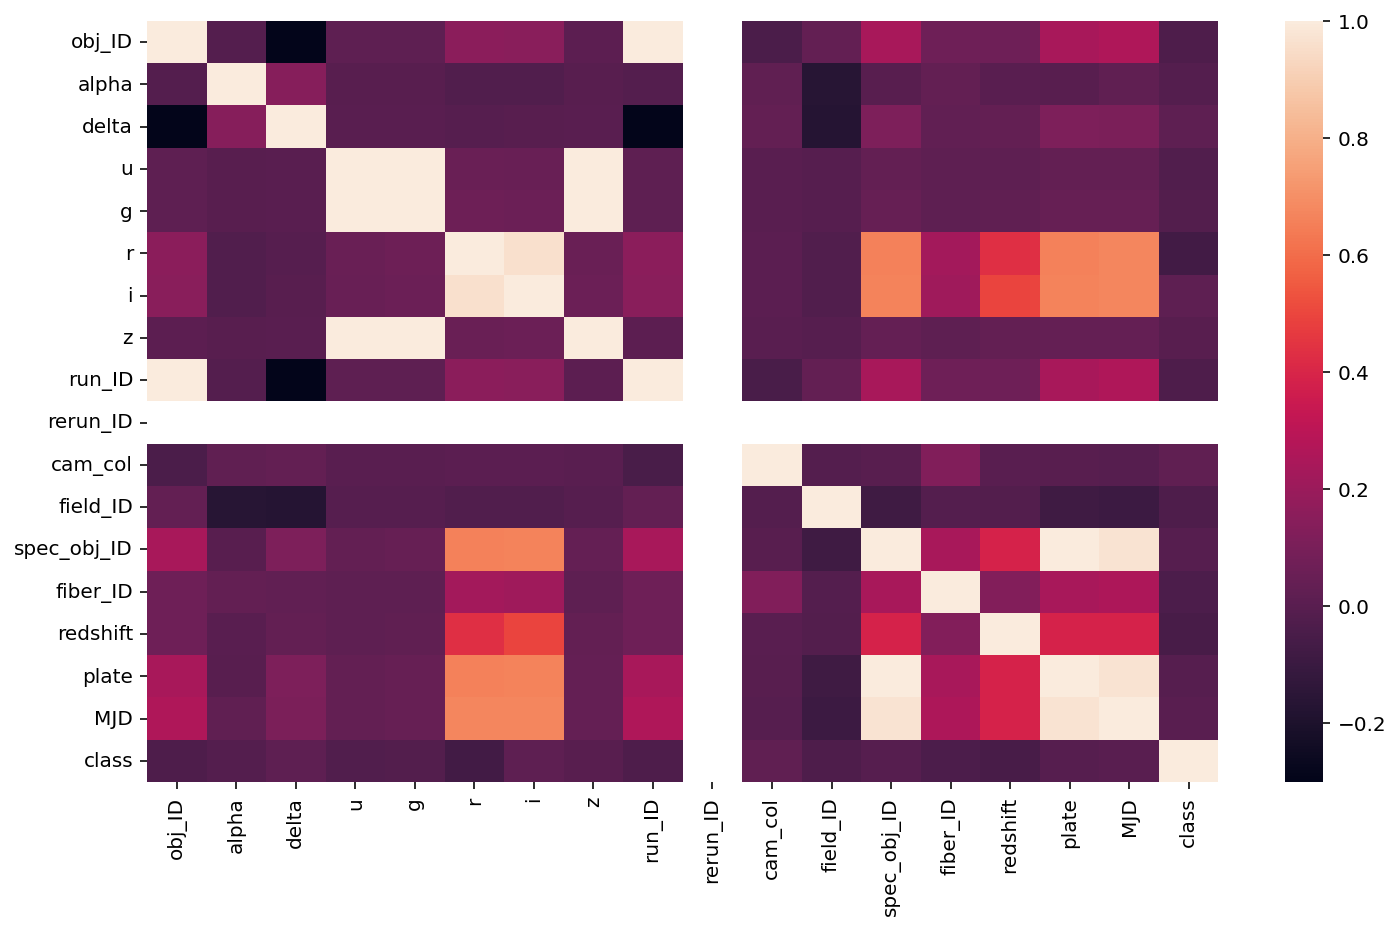

In [8]:
sns.heatmap(correlation)

In [9]:
train.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,449.312740,0.576661,5137.009660,55588.647500
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,272.498404,0.730707,2952.303351,1808.484233
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,1.000000,-0.009971,266.000000,51608.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,221.000000,0.054517,2526.000000,54234.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,433.000000,0.424173,4987.000000,55868.500000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,645.000000,0.704154,7400.250000,56777.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,1000.000000,7.011245,12547.000000,58932.000000


In [10]:
train['rerun_ID'].unique()

array([301])

נשים לב למספר דברם :  עמודת rerun\_ID תמיד שווה ל301 ולכן לא מספקת אינפורמציה ולכן נמחק אותה.

דבר שני ניתן לראות שהמינימום הוא מינוס 9999 ולכן נסיק שיש נקודה בעיתית, נימצא אותה ונמחק


In [11]:
train = train.drop(columns=['obj_ID','run_ID','rerun_ID','MJD','spec_obj_ID'])
train.head()

,alpha,delta,u,g,r,i,z,cam_col,field_ID,fiber_ID,redshift,plate,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,171,0.634794,5812,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,427,0.779136,10445,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,299,0.644195,4576,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,775,0.932346,9149,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,842,0.116123,6121,GALAXY


In [12]:
train = train.sort_values('u')
train.head()

,alpha,delta,u,g,r,i,z,cam_col,field_ID,fiber_ID,redshift,plate,class
79543,224.006526,-0.624304,-9999.00000,-9999.00000,18.16560,18.01675,-9999.00000,2,537,162,0.000089,3314,STAR
57763,208.358688,33.825699,10.99623,13.66217,12.35763,12.63744,11.30247,6,229,342,3.955592,2117,QSO
75784,239.473361,27.594369,12.10168,10.49820,10.11604,10.00865,10.44131,3,235,274,0.000008,3005,STAR
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.41786,10.22551,4,79,384,0.000025,3005,STAR
75620,239.207155,27.898444,12.30349,10.67180,10.19460,10.05509,10.65056,3,233,316,0.000003,3005,STAR


In [13]:
train = train.drop(index=79543)
train.head()

,alpha,delta,u,g,r,i,z,cam_col,field_ID,fiber_ID,redshift,plate,class
57763,208.358688,33.825699,10.99623,13.66217,12.35763,12.63744,11.30247,6,229,342,3.955592,2117,QSO
75784,239.473361,27.594369,12.10168,10.49820,10.11604,10.00865,10.44131,3,235,274,0.000008,3005,STAR
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.41786,10.22551,4,79,384,0.000025,3005,STAR
75620,239.207155,27.898444,12.30349,10.67180,10.19460,10.05509,10.65056,3,233,316,0.000003,3005,STAR
75583,239.702668,27.467439,12.99664,11.33897,10.98255,10.87374,11.19448,3,237,270,0.000174,3005,STAR


<Axes: xlabel='class', ylabel='count'>

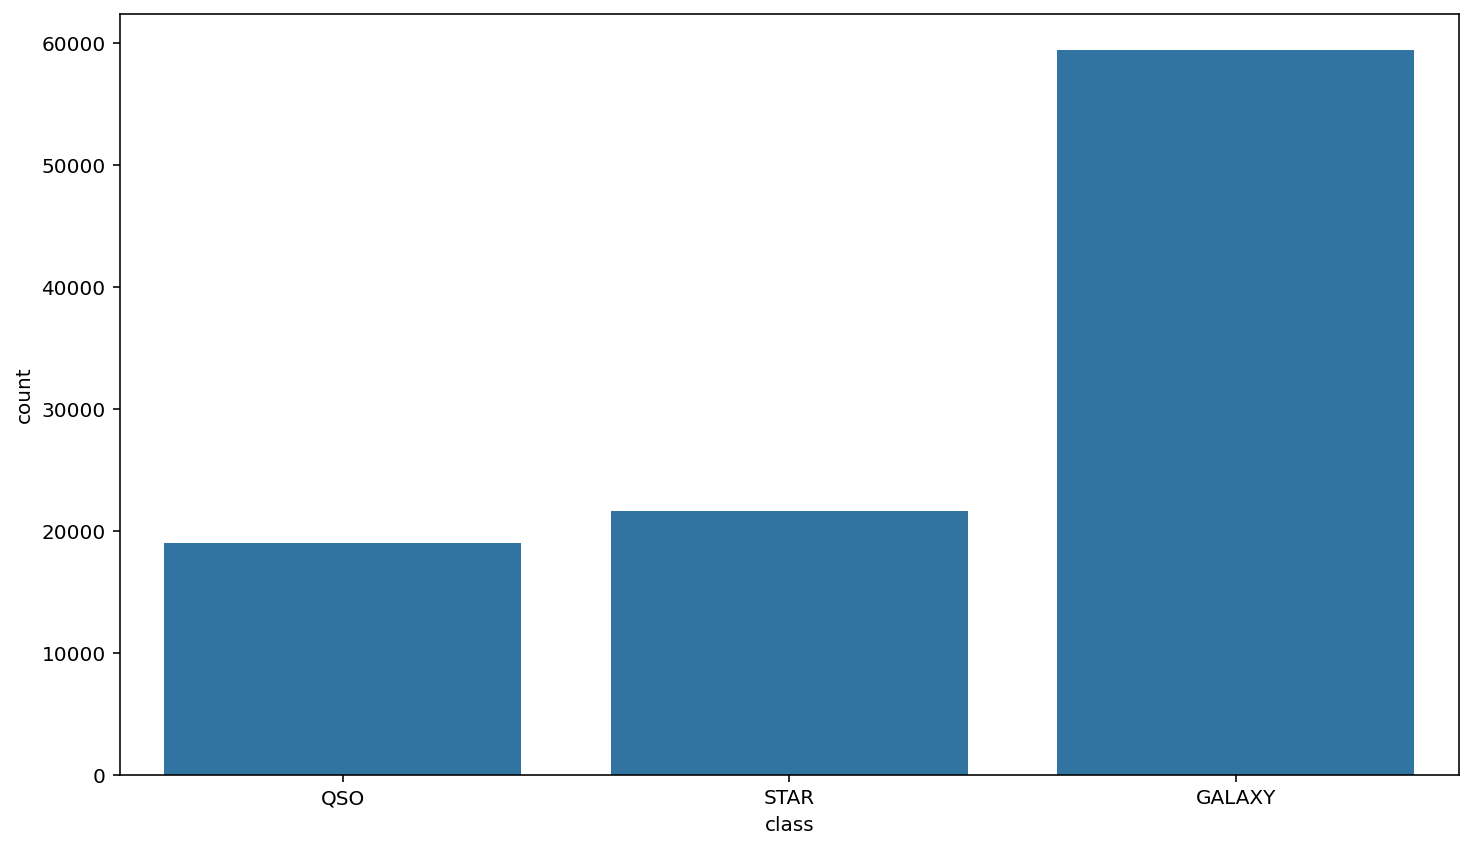

In [14]:
sns.countplot(x='class' ,data=train)

In [16]:
train.nunique(axis=0)

alpha       99998
delta       99998
u           93747
g           92650
r           91900
i           92018
z           92006
cam_col         6
field_ID      856
fiber_ID     1000
redshift    99294
plate        6284
class           3
dtype: int64

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'fiber_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>]], dtype=object)

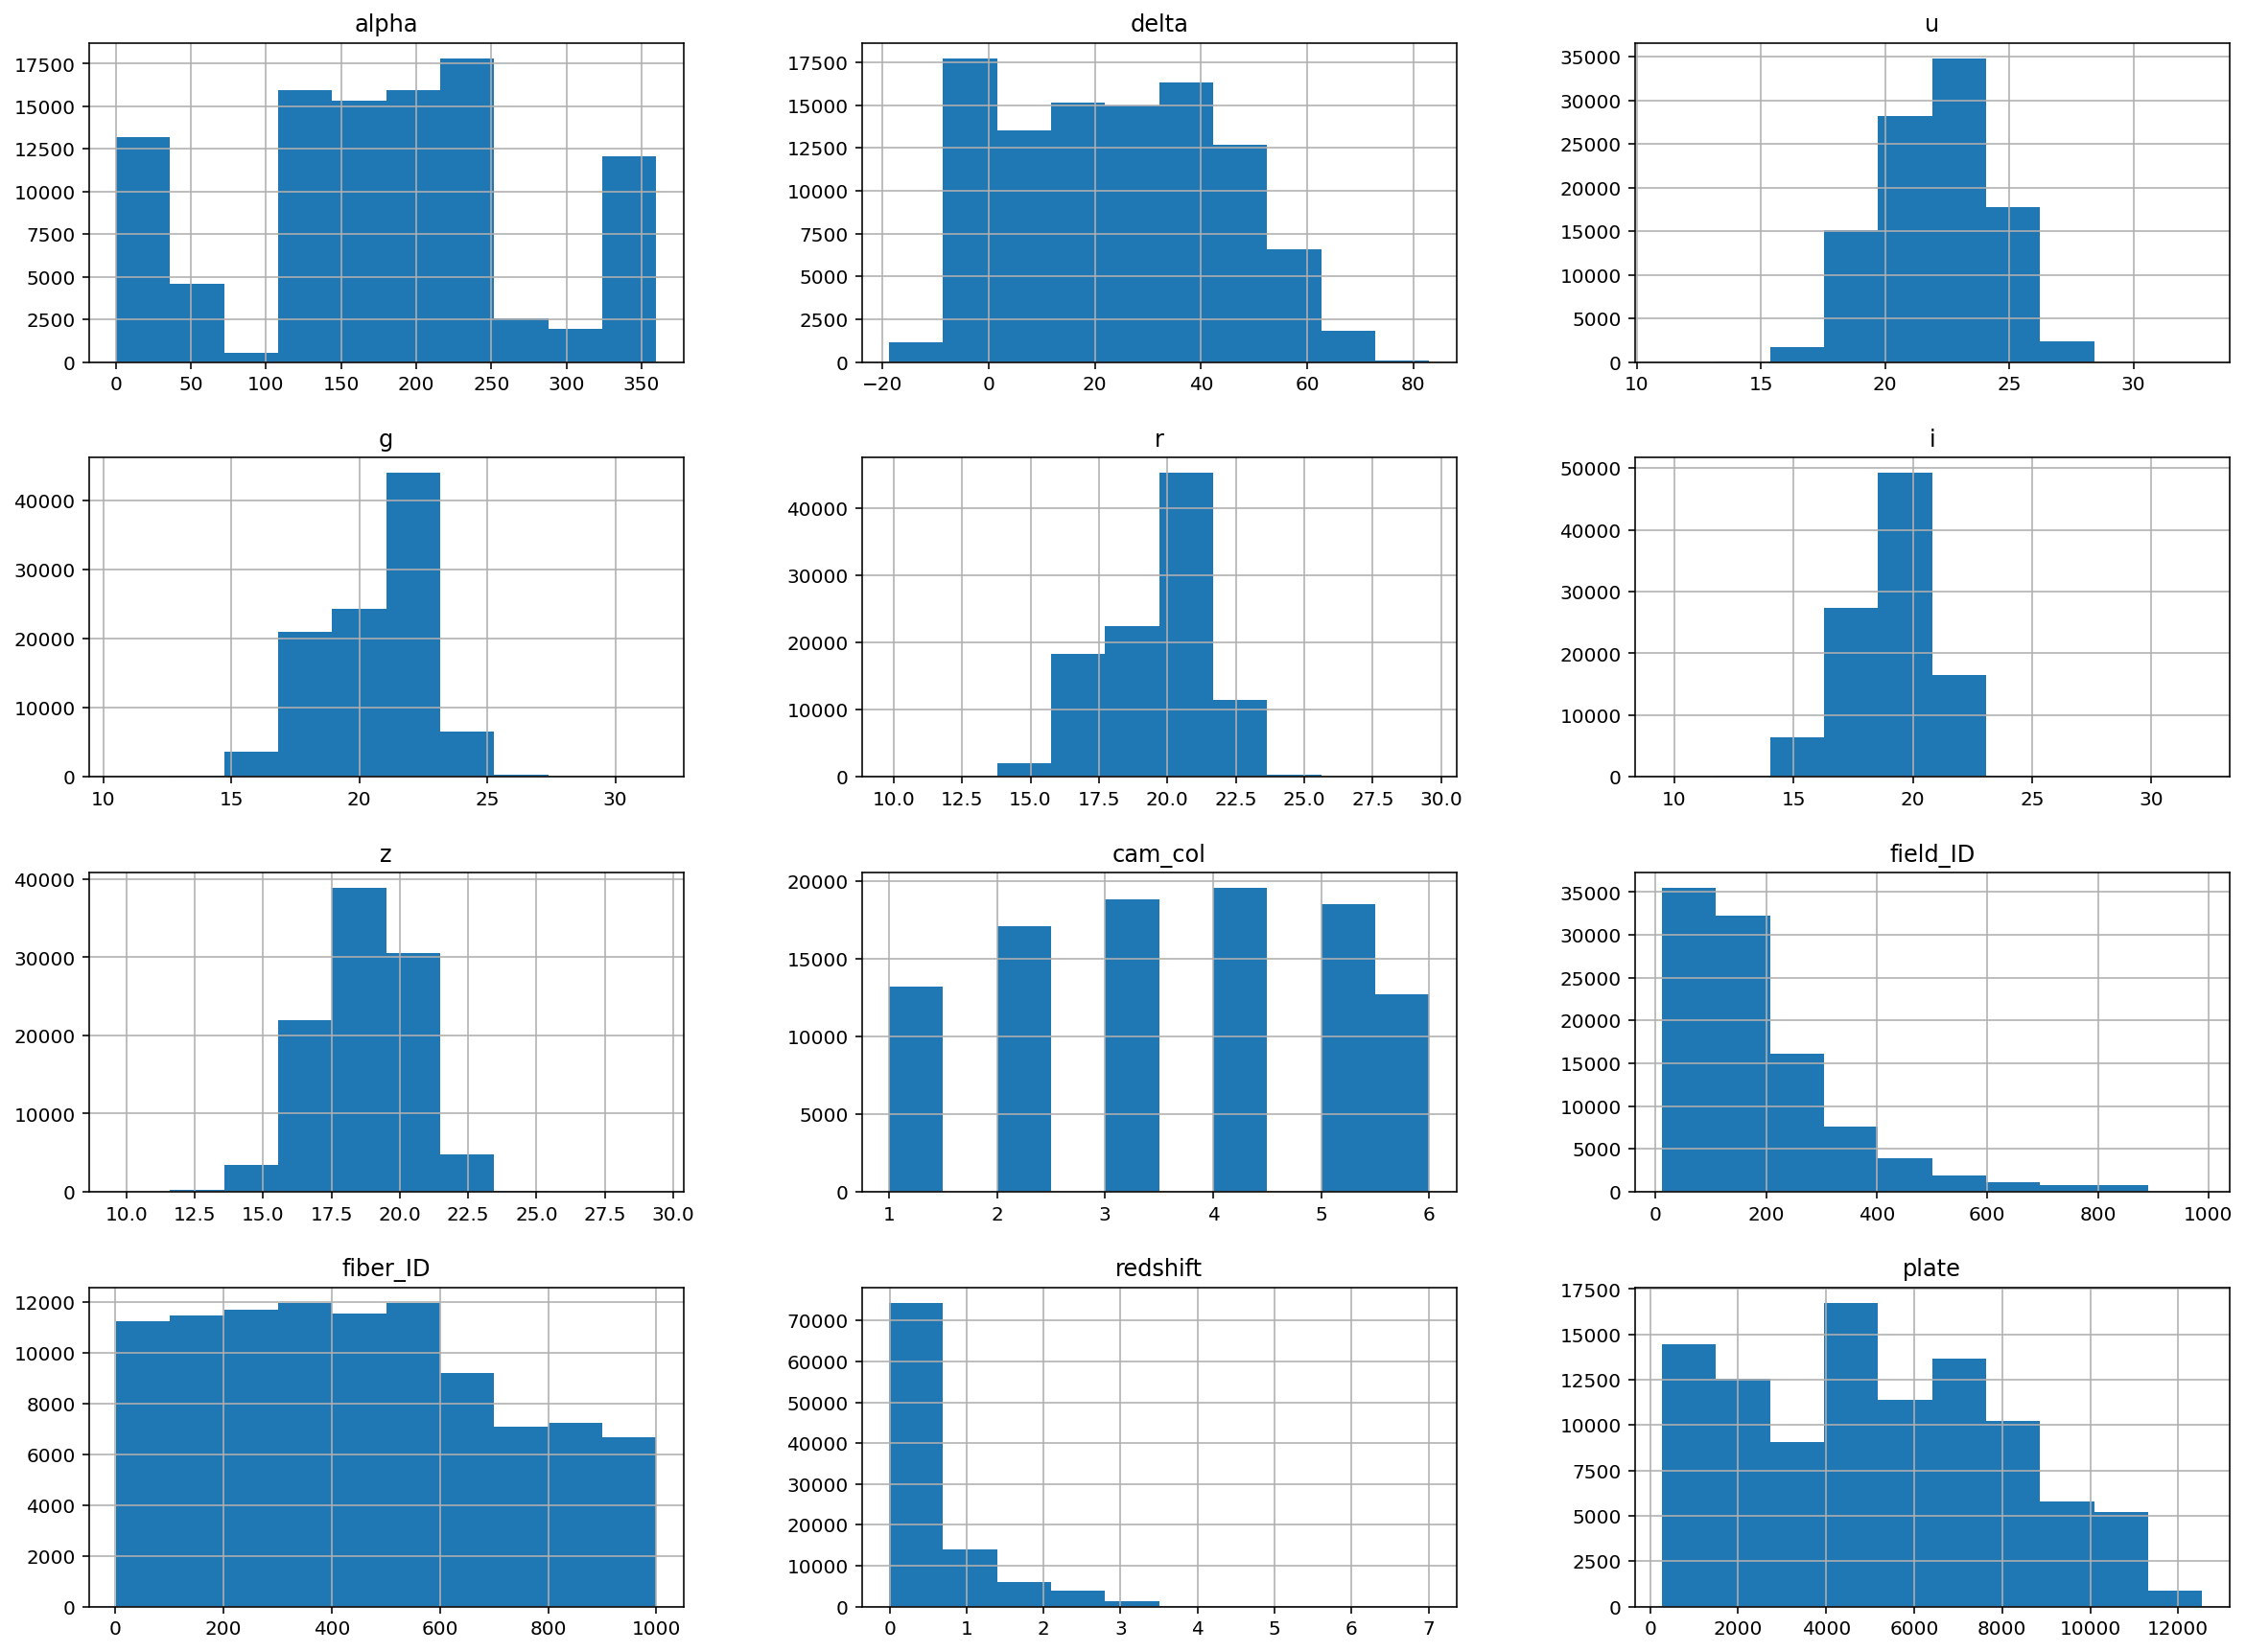

In [15]:
train.hist(figsize = (20,15))

In [17]:
fetures = pd.DataFrame(train.drop(['class'], axis=1))
classes = pd.DataFrame(train['class'])
fetures.head()

,alpha,delta,u,g,r,i,z,cam_col,field_ID,fiber_ID,redshift,plate
57763,208.358688,33.825699,10.99623,13.66217,12.35763,12.63744,11.30247,6,229,342,3.955592,2117
75784,239.473361,27.594369,12.10168,10.49820,10.11604,10.00865,10.44131,3,235,274,0.000008,3005
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.41786,10.22551,4,79,384,0.000025,3005
75620,239.207155,27.898444,12.30349,10.67180,10.19460,10.05509,10.65056,3,233,316,0.000003,3005
75583,239.702668,27.467439,12.99664,11.33897,10.98255,10.87374,11.19448,3,237,270,0.000174,3005


In [18]:
#sns.pairplot(train)

אחת שתיים שלוש ארבע abcd חמש שש שבע שמונה

